In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
retail = pd.read_csv('./data/OnlineRetail.csv')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [193]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [194]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [195]:
# customer id가 있는 데이터만 추출..

In [196]:
retail = retail[pd.notnull(retail['CustomerID'])]
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [197]:
# 주문량과 주문가격이 0 이상인 데이터만 추출..

In [198]:
retail = retail[retail['Quantity'] > 0]

In [199]:
retail = retail[retail['UnitPrice'] > 0]

In [200]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [201]:
retail['CustomerID'] = retail['CustomerID'].astype(np.int32)

In [202]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  int32  
 7   Country      397884 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 25.8+ MB


In [203]:
retail.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom


In [204]:
retail['CheckoutPrice'] = retail['UnitPrice'] * retail['Quantity']

In [205]:
retail.to_csv('./data/OnlineRetailClean.csv')

In [206]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      397884 non-null  object 
 1   StockCode      397884 non-null  object 
 2   Description    397884 non-null  object 
 3   Quantity       397884 non-null  int64  
 4   InvoiceDate    397884 non-null  object 
 5   UnitPrice      397884 non-null  float64
 6   CustomerID     397884 non-null  int32  
 7   Country        397884 non-null  object 
 8   CheckoutPrice  397884 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 28.8+ MB


In [207]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

In [208]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397884 non-null  object        
 1   StockCode      397884 non-null  object        
 2   Description    397884 non-null  object        
 3   Quantity       397884 non-null  int64         
 4   InvoiceDate    397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float64       
 6   CustomerID     397884 non-null  int32         
 7   Country        397884 non-null  object        
 8   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 28.8+ MB


In [209]:
## 전체매출

In [210]:
retail['CheckoutPrice'].sum()

8911407.904

In [211]:
## 국가별 매출액..

In [212]:
retail.groupby('Country')['CheckoutPrice'].sum()

Country
Australia               1.385213e+05
Austria                 1.019868e+04
Bahrain                 5.484000e+02
Belgium                 4.119634e+04
Brazil                  1.143600e+03
Canada                  3.666380e+03
Channel Islands         2.045044e+04
Cyprus                  1.359038e+04
Czech Republic          8.267400e+02
Denmark                 1.895534e+04
EIRE                    2.655459e+05
European Community      1.300250e+03
Finland                 2.254608e+04
France                  2.090240e+05
Germany                 2.288671e+05
Greece                  4.760520e+03
Iceland                 4.310000e+03
Israel                  7.221690e+03
Italy                   1.748324e+04
Japan                   3.741637e+04
Lebanon                 1.693880e+03
Lithuania               1.661060e+03
Malta                   2.725590e+03
Netherlands             2.854463e+05
Norway                  3.616544e+04
Poland                  7.334650e+03
Portugal                3.3439

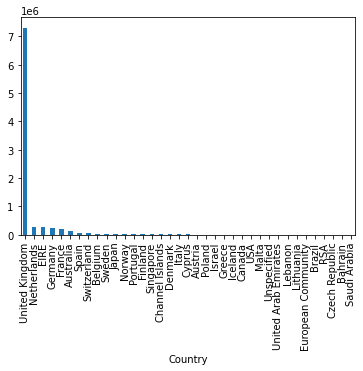

In [213]:
retail.groupby('Country')['CheckoutPrice'].sum().sort_values(ascending=False)\
[:50].plot(kind='bar')

In [214]:
## 국가별 매출 비중

In [215]:
retail.groupby('Country')['CheckoutPrice'].sum()/retail['CheckoutPrice'].sum()

Country
Australia               0.015544
Austria                 0.001144
Bahrain                 0.000062
Belgium                 0.004623
Brazil                  0.000128
Canada                  0.000411
Channel Islands         0.002295
Cyprus                  0.001525
Czech Republic          0.000093
Denmark                 0.002127
EIRE                    0.029798
European Community      0.000146
Finland                 0.002530
France                  0.023456
Germany                 0.025682
Greece                  0.000534
Iceland                 0.000484
Israel                  0.000810
Italy                   0.001962
Japan                   0.004199
Lebanon                 0.000190
Lithuania               0.000186
Malta                   0.000306
Netherlands             0.032032
Norway                  0.004058
Poland                  0.000823
Portugal                0.003752
RSA                     0.000112
Saudi Arabia            0.000016
Singapore               0.002388
Sp

In [216]:
## 월별매출액을 bar chart로 나타내시오..

In [217]:
# str(retail['InvoiceDate'].dt.year) + str(retail['InvoiceDate'].dt.month)

In [218]:
retail['month'] = retail['InvoiceDate'].apply(lambda x: str(x.year) + str(x.month))

In [219]:
retail.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3,201012


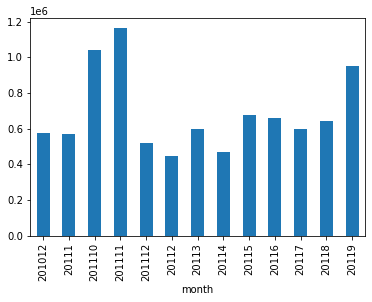

In [220]:
retail.groupby('month')['CheckoutPrice'].sum().plot(kind='bar')

In [221]:
## 요일별 매출을 bar chart

In [222]:
retail['day'] = retail['InvoiceDate'].apply(lambda x: x.dayofweek)

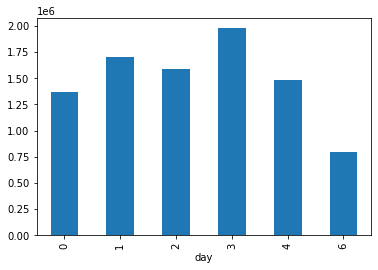

In [223]:
retail.groupby('day')['CheckoutPrice'].sum().plot(kind='bar')

In [224]:
## 시간대별 매출

In [225]:
retail['time'] = retail['InvoiceDate'].apply(lambda x: x.hour)

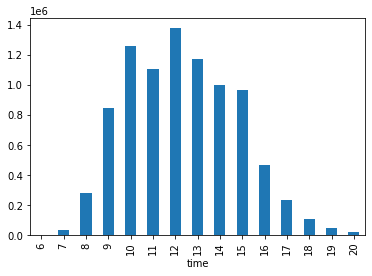

In [226]:
retail.groupby('time')['CheckoutPrice'].sum().plot(kind='bar')

In [227]:
## 매출 10대 상품..

In [228]:
prd10 = retail.groupby('StockCode')['CheckoutPrice'].sum().sort_values(ascending=False)[:10]
prd10.index

Index(['23843', '22423', '85123A', '85099B', '23166', 'POST', '47566', '84879',
       'M', '23084'],
      dtype='object', name='StockCode')

In [229]:
prd10 = retail.set_index('StockCode').loc[prd10.index].head(10)

In [230]:
## 매출 10대 상품의 월별 판매 추이 출력, chart

In [231]:
prd10 = retail.set_index('StockCode').loc[prd10.index]

In [232]:
prd10.groupby(['StockCode','month'])['CheckoutPrice'].sum()

StockCode  month 
22423      201012    159810.30
           20111      96889.50
           201110    107285.85
           201111     99578.16
           201112     40905.27
           20112      86036.85
           20113     133176.60
           20114     114493.50
           20115     103532.40
           20116      74061.90
           20117     110025.00
           20118      80410.05
           20119      77131.17
23843      201112    168469.60
Name: CheckoutPrice, dtype: float64

In [233]:
prd10.groupby(['StockCode','month'])['CheckoutPrice'].sum().unstack()

month,201012,20111,201110,201111,201112,20112,20113,20114,20115,20116,20117,20118,20119
StockCode,,,,,,,,,,,,,
22423,159810.3,96889.5,107285.85,99578.16,40905.27,86036.85,133176.6,114493.5,103532.4,74061.9,110025.0,80410.05,77131.17
23843,NaN,NaN,NaN,NaN,168469.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
prd10.groupby(['StockCode','month'])['CheckoutPrice'].sum().unstack().T

StockCode,22423,23843
month,,
201012,159810.30,NaN
20111,96889.50,NaN
201110,107285.85,NaN
201111,99578.16,NaN
201112,40905.27,168469.6
20112,86036.85,NaN
20113,133176.60,NaN
20114,114493.50,NaN
20115,103532.40,NaN


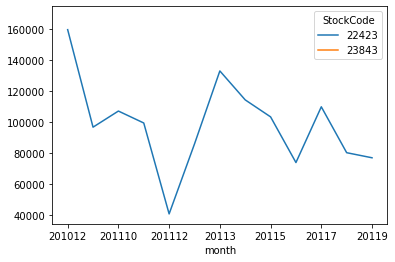

In [235]:
prd10.groupby(['StockCode','month'])['CheckoutPrice'].sum().unstack().T.plot()

In [236]:
## cohort 분석
## 동질적인 집단을 묶어서 집단별로 분석..
## 처음 구매한 고객이 이후에 얼마나 지속적으로 구매를 하는지 

In [237]:
from datetime import datetime

In [238]:
retail = pd.read_csv('./data/OnlineRetailClean.csv', dtype = {'UnitPrice':np.float32,
                                                    'Customer ID':np.int32,
                                                    'Quantity':np.int32},
           index_col = 0)

In [239]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      397884 non-null  int64  
 1   StockCode      397884 non-null  object 
 2   Description    397884 non-null  object 
 3   Quantity       397884 non-null  int32  
 4   InvoiceDate    397884 non-null  object 
 5   UnitPrice      397884 non-null  float32
 6   CustomerID     397884 non-null  int64  
 7   Country        397884 non-null  object 
 8   CheckoutPrice  397884 non-null  float64
dtypes: float32(1), float64(1), int32(1), int64(2), object(4)
memory usage: 27.3+ MB


In [240]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

In [241]:
def get_month_as_datetime(date):
    return datetime(date.year, date.month, 1)

In [242]:
retail['month'] = retail['InvoiceDate'].apply(get_month_as_datetime)

In [243]:
# 각 고객의 최초 구매월을 출력. 칼럼 추가

In [244]:
month_group = retail.groupby('CustomerID')['month']

In [245]:
retail['monthstarted'] = month_group.transform(np.min)

In [246]:
# 최초 구매일 이후  몇 개월이 지났는지 추출, 칼럼삽입

In [247]:
retail['monthpassed'] = (retail['month'].dt.year - retail['monthstarted']\
                         .dt.year)*12 + (retail['month'].dt.month - \
                                         retail['monthstarted'].dt.month)
retail.head(2)

# InvoiceDate : 주문시점의 날짜데이터
# month : 주문시점의 월..
# monthstarted : 최초주문 시점 날짜
# monthpassed : 최초두문 이후 현재 주문시점까지의 기간..

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,month,monthstarted,monthpassed
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,0


In [248]:
retail.monthpassed

0         0
1         0
2         0
3         0
4         0
         ..
541904    4
541905    4
541906    4
541907    4
541908    4
Name: monthpassed, Length: 397884, dtype: int64

In [249]:
# unique한 데이터의 갯수를 출력..

def get_unique_no(x):
    return len(np.unique(x))

In [250]:
# 최초구매일과 최초구매후 경과일수가 동일한 집으로 묶는다.

cohort_group = retail.groupby(['monthstarted','monthpassed'])

In [251]:
cohort_df = cohort_group['CustomerID'].agg(get_unique_no).reset_index()
cohort_df

,monthstarted,monthpassed,CustomerID
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,286
3,2010-12-01,3,340
4,2010-12-01,4,321
...,...,...,...
86,2011-10-01,1,86
87,2011-10-01,2,41
88,2011-11-01,0,323
89,2011-11-01,1,36


In [252]:
cohort_df = cohort_group['CustomerID'].agg(get_unique_no)
customer_cohort = cohort_df.unstack()
customer_cohort

monthpassed,0,1,2,3,4,5,6,7,8,9,10,11,12
monthstarted,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


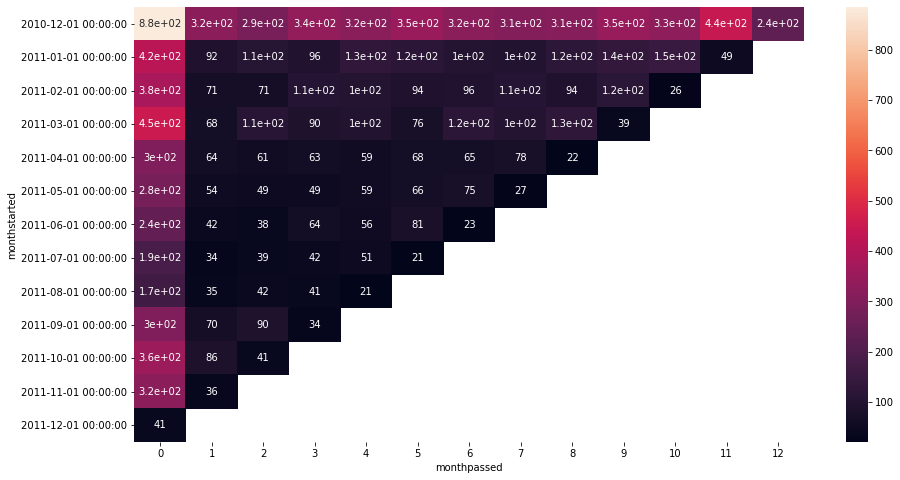

In [253]:
xticks = np.arange(0,13)
yticks = customer_cohort.index

plt.figure(figsize = (15,8))
sns.heatmap(customer_cohort,
           annot = True,
           xticklabels = xticks,
           yticklabels = yticks)